# Goal

The goal of the notebook is to analyse the steam market of gaemes. Target Variables of this project are:
* coppies sold
* amount of people playing the game
* reviews
  
The analysis will be based on the features such as:
* core features(owners, players, reviews)
* tags
* genres
* languages
* price

The dataset consists of the top 10000 games on steam ordered by the amount of owners. All the data was gathered witg SteamSpy API on the November 10th 2025. 

# Innitialization and first look

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("../data/processed_game_data.csv")
sns.set_theme(style="whitegrid", palette="muted")

In [2]:
df.head()

,appid,name,developer,publisher,positive,negative,owners,average_forever,average_2weeks,median_forever,...,Audio Production,Software Training,Web Publishing,Nudity,Violent,Free to Play,Movie,Gore,Sexual Content,Accounting
0,730.0,Counter-Strike: Global Offensive,Valve,Valve,7642084.0,1173003.0,"100,000,000 .. 200,000,000",33930.0,730.0,6497.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1172470.0,Apex Legends,Respawn,Electronic Arts,668053.0,326926.0,"100,000,000 .. 200,000,000",10226.0,703.0,939.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,578080.0,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.",1520457.0,1037487.0,"100,000,000 .. 200,000,000",23556.0,892.0,5987.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1623730.0,Palworld,Pocketpair,Pocketpair,358266.0,22443.0,"50,000,000 .. 100,000,000",3715.0,698.0,2111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,440.0,Team Fortress 2,Valve,Valve,1044264.0,117208.0,"50,000,000 .. 100,000,000",22688.0,589.0,4705.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The way dataset is structered:
* Values from 0 to 19 are core game informations(where 18th and 19th are game tags)
* 20 to 86 are languages
* 87 to 116 are genres

In [3]:
df.iloc[:, 6:18].describe()

,average_forever,average_2weeks,median_forever,median_2weeks,initialprice,ccu,review_ratio,popularity_change,engagement_spread,language_count,owners_numeric
count,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9990.000000,9990.000000,9990.000000,9.990000e+03
mean,1028.906707,132.788989,471.467267,139.351652,1283.503403,5.648834e+02,0.780324,-896.117718,3.930595,6.584484,9.330005e+05
std,3881.237179,892.949903,1716.507729,955.670285,1369.338811,1.129344e+04,0.161892,3718.134912,41.301699,5.904504,4.201193e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-130341.000000,0.000000,1.000000,7.500000e+04
25%,141.000000,0.000000,80.000000,0.000000,199.000000,0.000000e+00,0.697645,-716.000000,0.864632,1.000000,1.500000e+05
50%,307.000000,0.000000,209.000000,0.000000,999.000000,5.000000e+00,0.820846,-277.000000,1.278430,5.000000,3.500000e+05
75%,814.000000,3.000000,411.000000,3.000000,1999.000000,4.500000e+01,0.901173,-116.000000,2.356336,10.000000,7.500000e+05
max,133736.000000,20111.000000,64554.000000,20149.000000,14999.000000,1.013936e+06,0.994269,14733.000000,2135.127273,36.000000,1.500000e+08


* We can already see that there probably __a lot of noise in the data__. The sheet suggests there is a game with average play time of more than 2000 hours. In addition, concurrent users(ccu) has a large difference between 75th percentile and maximum value.  
* 'avarage_2weeks' shows that __large amount of games are dead__. Even at fourth quartile avarage playtime is only 3 minutes.  
* Mean of 'avarage_forever' is more than 2 times bigger than of 'median_forever' which means __most games have a small group of players who spend a lot more time on a game__ and skew the data.  
* We can also say that __on average games are getting rather positive reviews__. Which is actually understandable by the facts that a lot of reviews on bad games are being left for fun and people tend to games they liked only.


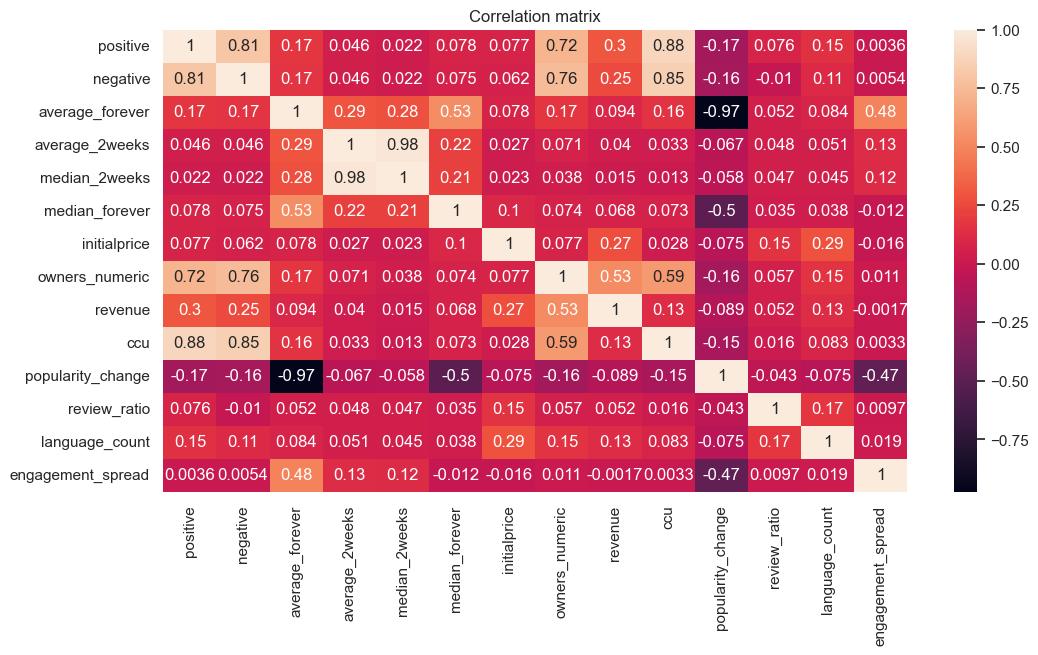

In [4]:
numerical = ['positive', 'negative', 'average_forever', 'average_2weeks', "median_2weeks", 
             'median_forever', 'initialprice', 'owners_numeric', 'revenue', 'ccu',
             'popularity_change', 'review_ratio', 'language_count', 'engagement_spread']
    
plt.figure(figsize=(12, 6))
ax = sns.heatmap(df[numerical].corr(), annot=True)
ax.set(
    title="Correlation matrix"
)
plt.show()

* The most noticible point on the heatmap is -0.97 correlation between the average playtime forever and popularity change(avrage_2weeks - avrage_forever). It once again tell us that __big amount of games lost their popularity__.
* Logically, __games with more languages have a higher price__.
* From 'ccu' and 'avarage_forever' we can see that __concurrent users doesn't have a strong correlation with the time spent on game__. Once again could be caused by the dead games.
* __Revenue is strongly affected by amount of owners and price__ which is completely understandable since revenue is estimated by the number of owners times price. It is also correlated to the amount of positive and negative reviews, reasoning behind it could be that with bigger number of people owning the games rises both amount of reviews and revenue.
* 'average_2weeks' and 'median_2weeks' are almost identical. This suggests that there is no big skew in how many hours people spent on game in tshorter period of time.



# Copies sold

In this section we will analyse how other features affect amount of people who own the game. It includes people who got the game for free, via keys or with discounts.  
The values that we are going to analyse are 'owners' and 'owners_numeric'. 'owners' is an ordinal value which represents the bin in which the number of people owning the game falls in. It is a string that looks like "lower_border .. upper_border". 'owner_numeric' is an integer that represent the mean of upper and lower borders of the bin. We will mostly work with 'owners' as for 'owners_numeric' was created as estimation for mathematical purposes.

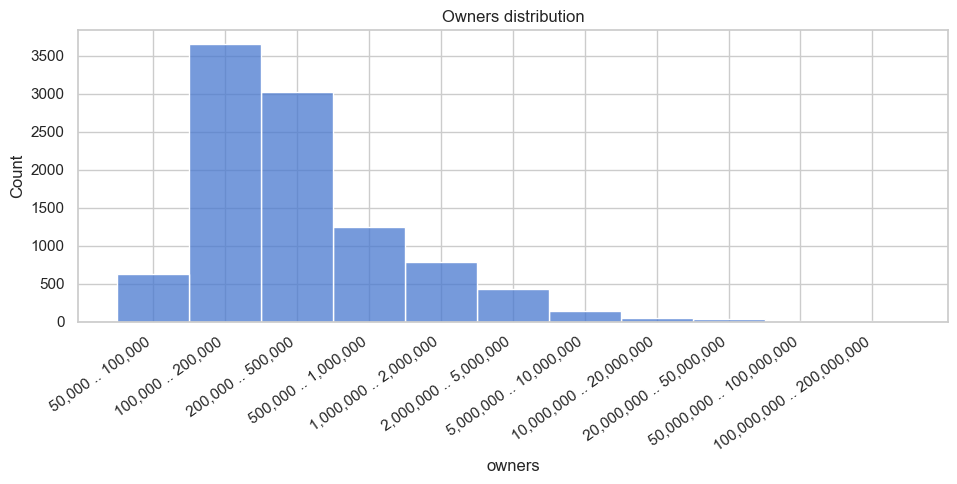

In [5]:
plt.figure(figsize=(10,5))
ax = sns.histplot(df["owners"])
ax.set(
    title="Owners distribution"
)
plt.xticks(rotation=35, ha="right")
plt.tight_layout()
plt.gca().invert_xaxis()
plt.show()

At first glance this distribution looks like right-skewed distribution. However, this shape is affected by the fact that sample contains only top 10000 games orderedby number of owners. This way we dont have most of the games that have less than 100,000 owners. In reality __population probably follows heavily-tailed distribution__ such as power-law. 

## Correlation with other features

### Price

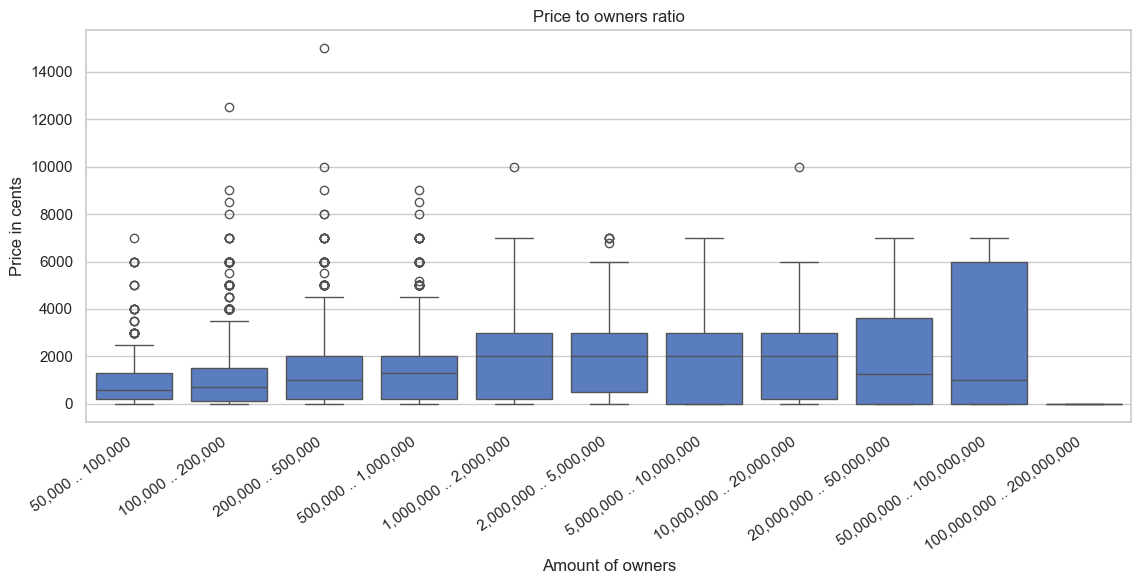

In [6]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x=df["owners"], y=df["initialprice"], native_scale=True, )
ax.set(
    xlabel="Amount of owners",
    ylabel="Price in cents",
    title="Price to owners ratio"
)
plt.xticks(rotation=35, ha="right")
plt.tight_layout()
plt.gca().invert_xaxis()
plt.show()

From this plot we can see that __there is no one true strategy to choose a price__. But we still can see a few patterns.
* Median of the price tends to go higher with amount of owners until it reaches 1,000,000. From there till 20,000,000 it stays at median of 20 dollars. This suggests that games from this range mostly have a good quality to price ratio. From 20,000,000 and more median tends to fall until the bin with highest ownership where all games are free. It is completaly expected for free or cheap games to have more players.
* Games from range 100,000,000 to 200,000,000 are: "Counter-Strike: Global Offensive", "Apex Legends", "PUBG: BATTLEGROUNDS". __All of which are free-to-play online shooters. Which means these games tend to gather a big audience arounds them.__
* Bin with 50,000,000 to 100,000,000 owners has really huge variance, despite a low median. Reason behind this are AAA games made by large studios with priceful games but a big fanbase.

Next we are going to test the theory if games games with number of owners ranging from 1,000,000 to 20,000,000 actually do have a good quality.

### Review ratio

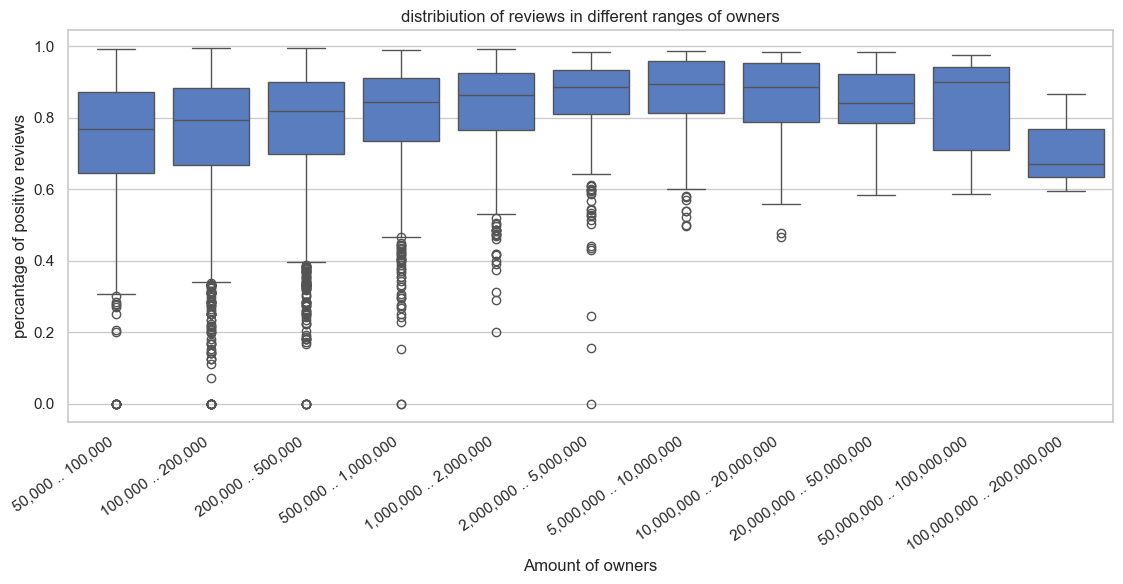

In [7]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x=df["owners"], y=df["review_ratio"], native_scale=True, )
ax.set(
    xlabel="Amount of owners",
    ylabel="percantage of positive reviews",
    title="distribiution of reviews in different ranges of owners"
)
plt.xticks(rotation=35, ha="right")
plt.tight_layout()
plt.gca().invert_xaxis()
plt.show()

The hypothesis aboubt games between 1 million and 20 million owners having the best quality and price is supported by this plot. This group of games has a really high median of review ratio with fairly small interquartile range, and first quartile barely going below 80% in some cases. From this we can state that __games with 1,000,000 to 20,000,000 owners tend to offer the best deals__ 
From this plot we also see an intresting situation with games that have from 50,000,000 to 100,000,000 owners. it naturally has a highest median but high variance is less expected. Cause of both facts could be AAA games once again. __Good projects with high quality raise the median, when failed projects from big studios with high price lower the first quartile.__  
Even more captivating is case with the highest amount of owners. It has the lowest median. It is hard to talk generally about it, since there is only three games in this bin. We can assume that it comes from the fact, that those games are free-to-play. It forces developers to add microtransaction, which are generally hated in gaming comunity.

## Owners and categorical values

### Popularity of genres

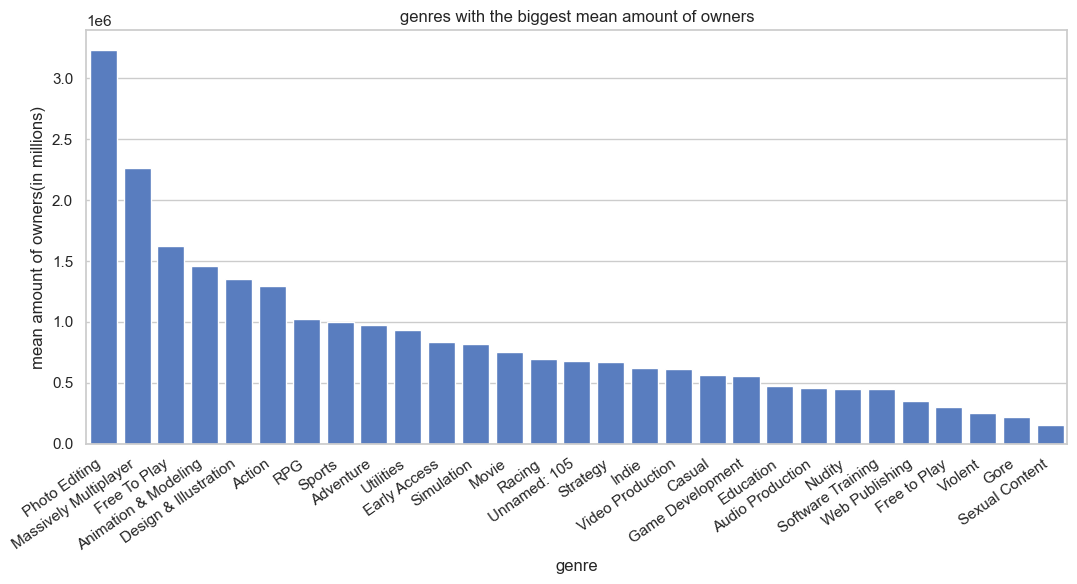

In [8]:
mean_owners_per_genre = (
    df.iloc[:, 88:117]
    .mul(df["owners_numeric"], axis=0)
    .sum()
    / df.iloc[:, 88:117].sum()
).sort_values(ascending=False)

plt.figure(figsize=(11,6))
ax = sns.barplot(mean_owners_per_genre)
ax.set(
    xlabel="genre",
    ylabel="mean amount of owners(in millions)",
    title="genres with the biggest mean amount of owners"
)
plt.xticks(rotation=35, ha="right")
plt.tight_layout()
plt.show()

From this graph we already can see that there are 6 genres that dominate over other(having more than 1,000,000 owners on avarage). But they can be separated into two __the most popular categories:__
* __Editing softwares__. Their mean is being strongly carried by a couple applications that dominate in this field(like "Blender" or "Wallpaper engine"). There is not a big amount of these software on steam which makes mean go even higher.
* __Online shooters__. This plot supports our observation by showing that free-to-play, online, action games do tend to get more players. But we have to notice, that multiplayer and free games are not strictly connected to being action games. There are a lot of other popular games in these fields but we can not avoid the fact that it correlates with our previous statement.


On the other side we can see three genres with lowest averages. It is hard not to notice that they all fall into category "explicit". Those games were not made for a large audience and never gained one.

### What audience brings the most players

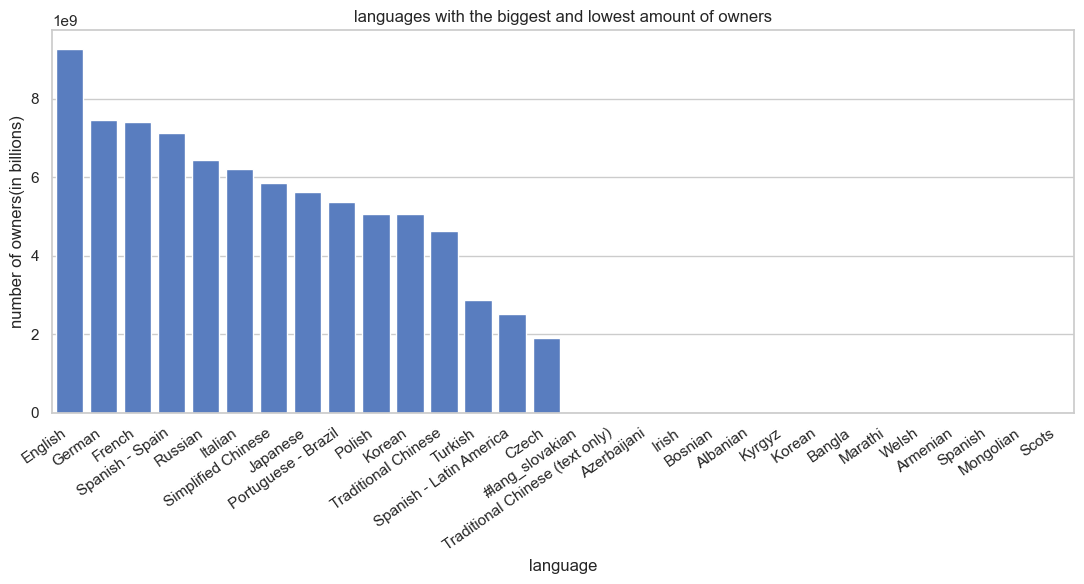

In [9]:
mean_owners_per_language = (
    df.iloc[:, 21:88]
    .mul(df["owners_numeric"], axis=0)
    .sum()
).sort_values(ascending=False)

plt.figure(figsize=(11,6))
ax = sns.barplot(pd.concat([mean_owners_per_language[:15], mean_owners_per_language[-15:]]))
ax.set(
    xlabel="language",
    ylabel="number of owners(in billions)",
    title="languages with the biggest and lowest amount of owners"
)
plt.xticks(rotation=35, ha="right")
plt.tight_layout()
plt.show()



It is really hard to interpretat enterpret this data. It can not be seen as visualisatioon of how many players having an additional language brings to the game because of few reasons.  
First of all, almost every game has english language, and german, french and spanish are logical second choises.  
Secondly, a game could have English and German. But even if everyone who played it would only know English, German still would gain as many value as English.  
Above all that, there is too big of a difference between the highest values and the lowest, making the lowest unreadable. 

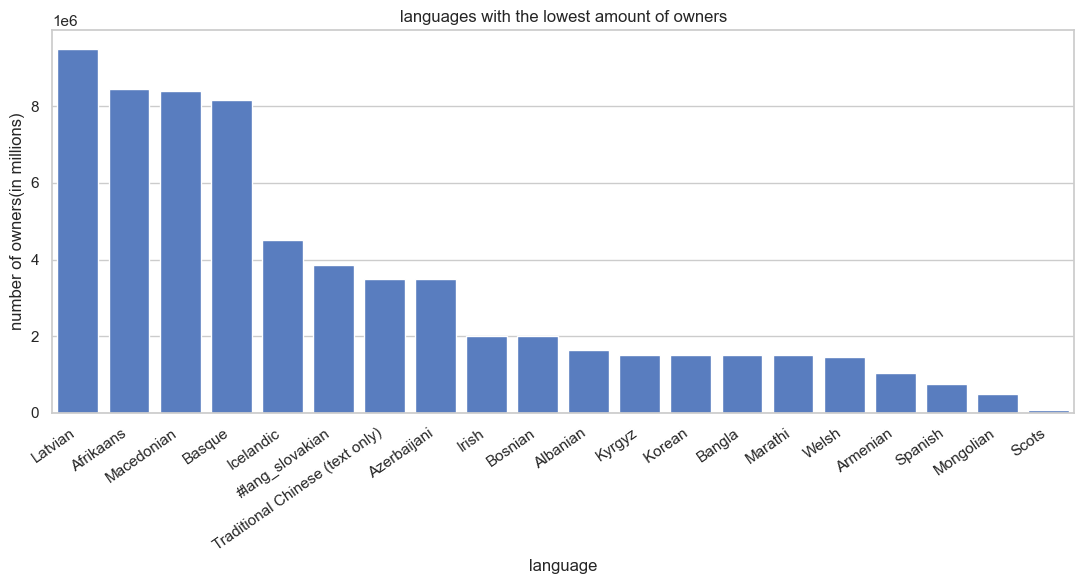

In [10]:
plt.figure(figsize=(11,6))
ax = sns.barplot(mean_owners_per_language[-20:])
ax.set(
    xlabel="language",
    ylabel="number of owners(in millions)",
    title="languages with the lowest amount of owners"
)
plt.xticks(rotation=35, ha="right")
plt.tight_layout()
plt.show()


From this we can fethc at least some kind of insights. Such a low amount of value would mean that these languages are mostly present in niche games, and are not a good choice for growth. __Languages that appear in small-market games:__
* __Middle asian languages__ such as Armenian, Mongolian, Kyrgyz.
* __Languages suppressed by English__. For example: Irish, Welsh, Marathi.

There is also noise. "Spanish" is incorrect name because in steam spanish always comes with a name of a dialect(Spanish - Latin America).  

# Players online

In this section we will analyse what types of game were popular at the time data was gathered.  
The main variable we are going to analyse in this section is 'ccu' which an abbreviation for "concurrent players". It is a descrete variables which describes number of players yesterday at the highest point(9th of November 2025). What's important to remeber is that this type of data is really sensitive to time when the data was gathered.  
Luckily, we have other, more stable features like: 'average_2weeks', 'median_2weeks', 'average_forever' and 'median_forever'. They describe the average/median time a person spent on game in some range of time. It is different from "concurrent players" since a game with small amount of owners still can have a high average playtime. 

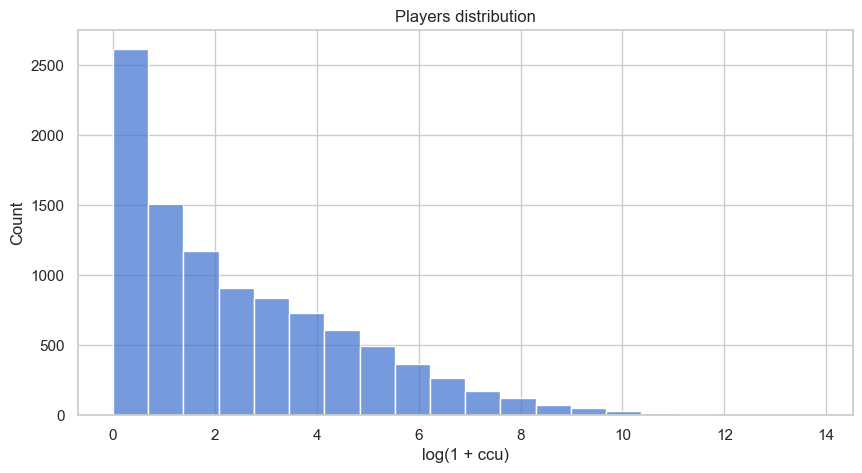

In [11]:
plt.figure(figsize=(10,5))
ax = sns.histplot(np.log1p(df["ccu"]), bins=20)
ax.set(
    title="Players distribution",
    xlabel="log(1 + ccu)"
)
plt.show()

The problem with our data is amount of games that have not been played recently. __Around 26% of games had no players receantly and 57% of games had less than 10 players__.  
Because of this log transformation (log(x + 1)) was used for better visualisation. From bot visualization and number of games with a small in game online we can make a deduction that __the data is heavily-tailed__.

## Correlation with numeric features

### Avarage time in a game in two weeks

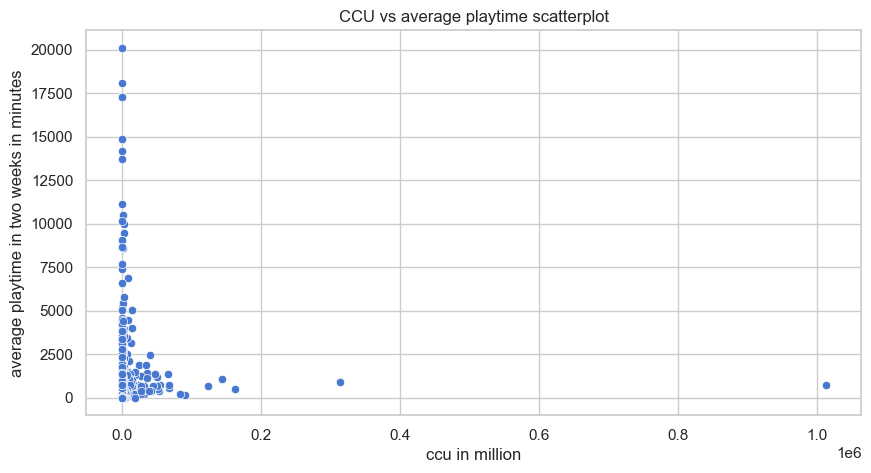

In [12]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x=df["ccu"], y=df["average_2weeks"])
ax.set(
    title="CCU vs average playtime scatterplot",
    xlabel="ccu in million",
    ylabel="average playtime in two weeks in minutes"
)
plt.show()

The scatter plot doesn't show strong positive correlation. Most of the point are clustered around low values of both concurrent users and average playtime. There is also a big variarity of playtime values around for games with near zero players, meaning __small games still can have people spending a lot of time on them__.  
Futhermore, games with very high online tend to have relatively moderate avarage time in game, meaning __big projects bring big amount of casual players__, who do not tend to spend a lot of time in games.

### Percentage of positive reviews

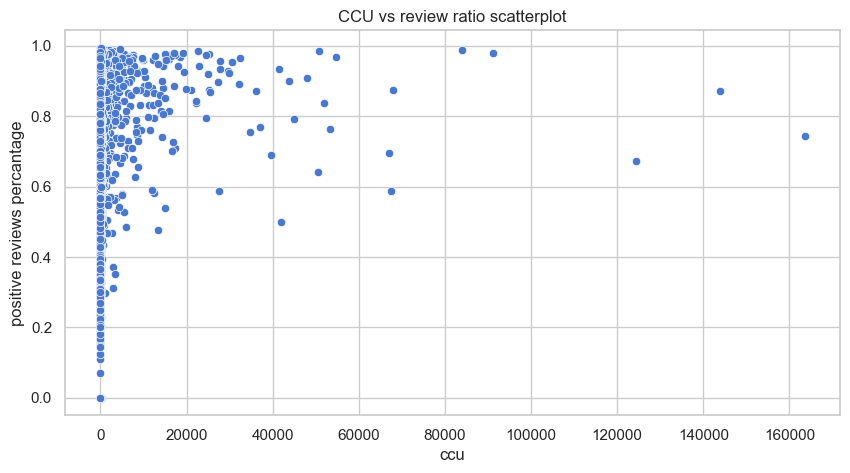

In [13]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x=df["ccu"].loc[df["ccu"] < 200000], y=df["review_ratio"].loc[df["ccu"] < 200000])
ax.set(
    title="CCU vs review ratio scatterplot",
    xlabel="ccu",
    ylabel="positive reviews percantage"
)
plt.show()

This scatter plot shows a slight correlation between ccu and review sentiment on the game. __There are only few games with less than 40% of positive opinion and having any people online__. After that there is a huge varience of values and no clear connection between amount of players and opinion.  
For better readability two games with highest ccu has been eliminated.

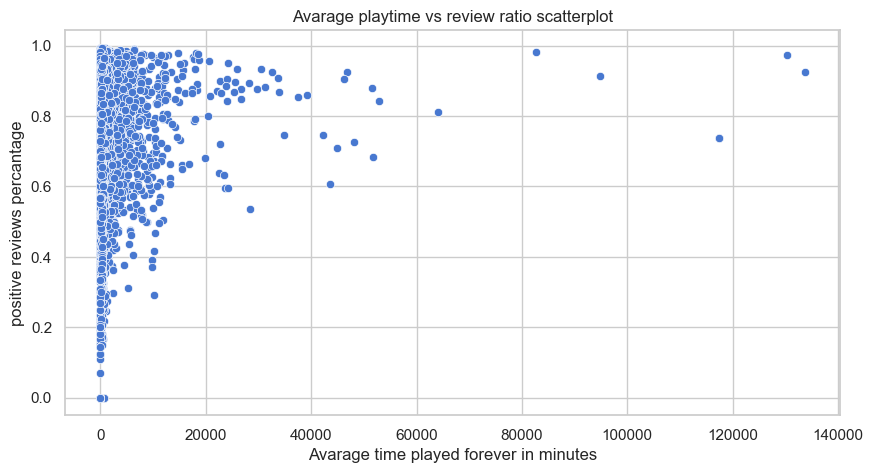

In [14]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x=df["average_forever"], y=df["review_ratio"])
ax.set(
    title="Avarage playtime vs review ratio scatterplot",
    xlabel="Avarage time played forever in minutes",
    ylabel="positive reviews percantage"
)
plt.show()

Situation gets much clearer when we plot average playtime instead of players online. Correlation becomes more noticeable, meaning both that __games with a lot of content and replayability tend to get better opinions__, and people play games they like more.

### Price vs time spent in game

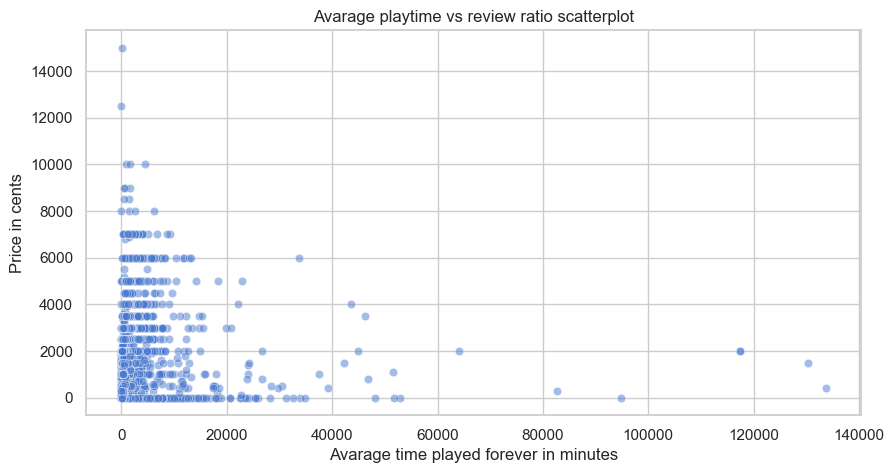

In [15]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x=df["average_forever"], y=df["initialprice"], alpha=0.5)
ax.set(
    title="Avarage playtime vs review ratio scatterplot",
    xlabel="Avarage time played forever in minutes",
    ylabel="Price in cents"
)
plt.show()

Intrestingly this plot shows, that people do not choose to spend a lot of time in priceful games. Games with highest average playtime per player have price no higher than 20 dollars.  
However, if we take a deeper look we can conclude, that __a lot of games with high average playtime are being carried by a few players, who spend a lot of time in program__. In reality, the median of those games is mostly less than 350 minutes. Nevertheless the game with the highest average still has a very high median(around 60,000). It is a cursor changer application, that probably has to be open all the time for it to work.

### Languages

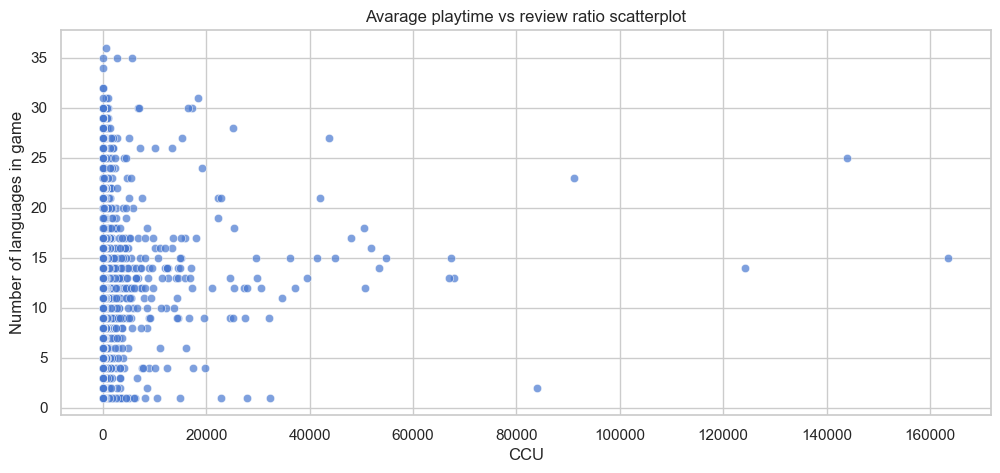

In [16]:
plt.figure(figsize=(12,5))
ax = sns.scatterplot(x=df["ccu"].loc[df["ccu"] < 200000], 
                     y=df["language_count"].loc[df["ccu"] < 200000], alpha=0.7)
ax.set(
    title="Avarage playtime vs review ratio scatterplot",
    xlabel="CCU",
    ylabel="Number of languages in game"
)
plt.show()

Plot suggests that game with around 15 languages tend to have more people playing them. But it is hard to draw conclusions from this plot. Amount of languages could be the effect of a game popularity. A game could be developed by a large studio from the beggning causing for it to have more languages and players. However, we can not overlook the fact, that __number of languages has a connection with amount of people playing__.

## Categorical values

### Tags

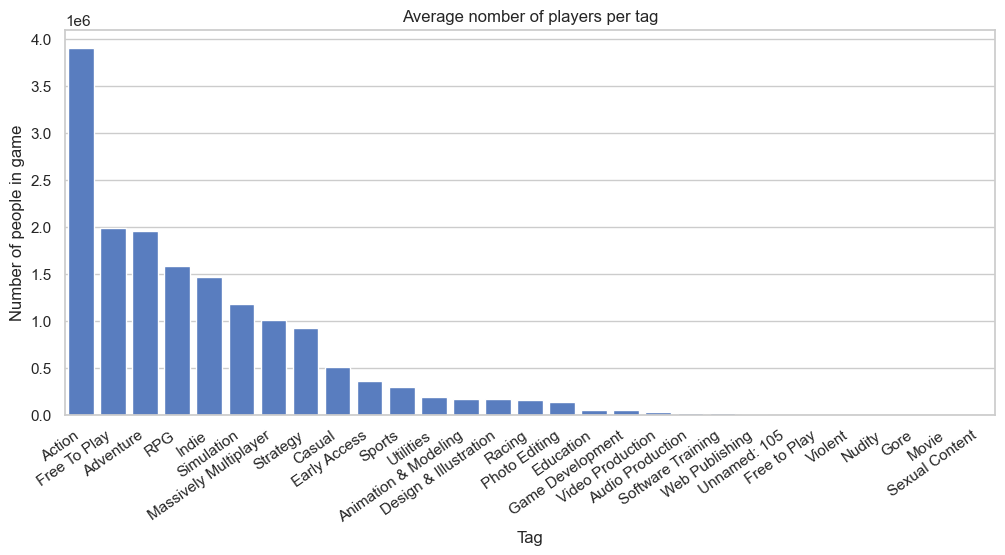

In [17]:
mean_players_per_genre = (
    df.iloc[:, 88:117]
    .mul(df["ccu"], axis=0)
    .sum()
).sort_values(ascending=False)


plt.figure(figsize=(12,5))
ax = sns.barplot(mean_players_per_genre)
ax.set(
    title="Average nomber of players per tag",
    xlabel="Tag",
    ylabel="Number of people in game"
)
plt.xticks(rotation=35, ha="right")
plt.show()

This plot shows certain similiarities to the on we did previously with number of owners. However, when we plot with concurrent users we don't have editing softwares at the top. Also one of the bigest changes is "Indie" tag. At the bottom the only noticiable difference is tag "Movie". From this we can make few insights:
* A lot of people get editing softwares but don't use them regularly.
* Games from small teams gain popularity lately.
* "Movie" games lost their popularity.

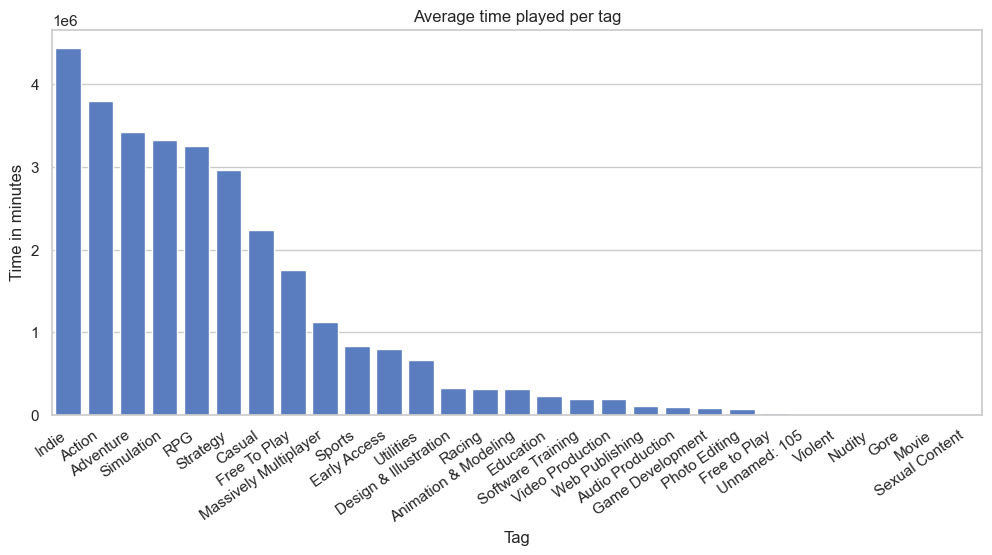

In [18]:
mean_time_per_genre = (
    df.iloc[:, 88:117]
    .mul(df["average_forever"], axis=0)
    .sum()
).sort_values(ascending=False)


plt.figure(figsize=(12,5))
ax = sns.barplot(mean_time_per_genre )
ax.set(
    title="Average time played per tag",
    xlabel="Tag",
    ylabel="Time in minutes"
)
plt.xticks(rotation=35, ha="right")
plt.show()

The plot shows, that not only indie games got more popular but also __people on average spend the most time in indie games__. Beside that we can conclude that free-to-play games can lure players into playing them, but they don't hold their audience for long time.

# Reviews

In this section we are going to analise what games games appeal to the audience. We are going to examine the 'reviews_ratio' feature which represents percentage of positive reviews on the game. Besides that we also have 'positive' and 'negative' which represent number of positive and negative reviews accordingly 

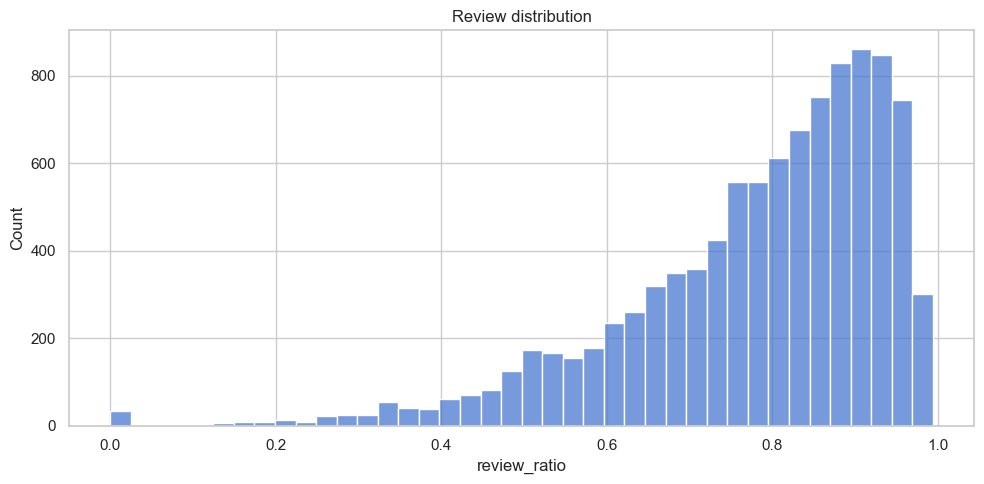

In [27]:
plt.figure(figsize=(10,5))
ax = sns.histplot(df["review_ratio"], bins=40)
ax.set(
    title="Review distribution"
)
plt.tight_layout()
plt.show()

Histogram shwos a left skewed distribution, where most games fall between 70% and 100% of positive reviewes. Mode lays around the 0.90.  
The skew suggests that __users tend to review games they liked__. It also means that bad games get abandoned, and good games survive and accumulate reviews.